In [13]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

# MitoCarta parsing

In [14]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2ID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()
mito_genes = MitoCarta[['EnsemblGeneID']].drop_duplicates().rename(columns={'EnsemblGeneID':'gene_id'})

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['gene_ids'] = ''
for i in range(len(MitoPW)):
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2ID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2ID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]
MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW[:5])

,MitoPathway Hierarchy,Genes,PW level,gene_ids
MitoPathway,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0..."


In [15]:
mtDNA = MitoCarta[['Symbol','EnsemblGeneID']]
mtDNA = mtDNA[mtDNA['Symbol'].str.startswith('mt-')].reset_index(drop=True)
mtDNA = mtDNA.rename(columns={'Symbol':'gene_name', 'EnsemblGeneID':'gene_id'})[['gene_id']]
mtDNA['mtDNA'] = 'mtDNA'
# display(mtDNA)

# Plot data

In [16]:
RNA = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
RD = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD_avg_log2FC.tsv', sep='\t').drop(columns='gene_name').rename(columns={'D4':'RD4','D8':'RD8'})

logFC = pd.merge(RNA, RD, on='gene_id')
display(logFC)

RD_logFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD_log2FC.tsv', sep='\t').drop(columns='gene_name')
display(RD_logFC)

,gene_id,R4,R8,RD4,RD8
0,ENSMUSG00000033845,1.919982,2.397623,-0.311108,-0.382188
1,ENSMUSG00000025903,0.564052,0.894128,0.143887,-0.212839
2,ENSMUSG00000033813,-0.823592,0.210519,0.151689,0.189858
3,ENSMUSG00000033793,0.192070,-0.043765,0.269876,0.283882
4,ENSMUSG00000025907,-0.130110,0.328257,0.088801,-0.326082
...,...,...,...,...,...
11805,ENSMUSG00000064360,1.702209,3.022970,-0.227778,-2.407071
11806,ENSMUSG00000064363,1.677543,2.216408,-1.022871,-1.317163
11807,ENSMUSG00000064367,1.287624,1.643277,-0.418699,-0.569325
11808,ENSMUSG00000064368,1.477040,2.066885,-0.609004,-0.318614


,gene_id,RD4a,RD4b,RD4c,RD8a,RD8b,RD8c
0,ENSMUSG00000033845,-0.671003,-0.069029,-0.193291,-0.341792,-0.441117,-0.363656
1,ENSMUSG00000025903,-0.194914,0.463091,0.163485,-0.464949,0.161578,-0.335146
2,ENSMUSG00000033813,-0.008186,0.401248,0.062004,0.168080,0.165488,0.236005
3,ENSMUSG00000033793,0.063644,0.347290,0.398696,0.084042,0.363091,0.404513
4,ENSMUSG00000025907,0.165708,0.342509,-0.241816,-0.234984,-0.623727,-0.119535
...,...,...,...,...,...,...,...
11805,ENSMUSG00000064360,0.019150,1.072969,-1.775453,-1.965660,-2.617272,-2.638280
11806,ENSMUSG00000064363,-1.840285,-0.182261,-1.046066,-1.764191,-0.912711,-1.274588
11807,ENSMUSG00000064367,-0.629857,0.198241,-0.824479,-0.826304,-0.370965,-0.510705
11808,ENSMUSG00000064368,-0.901645,-0.145785,-0.779583,-0.715231,0.115233,-0.355842


In [17]:
Genesets = {
    'All MitoCarta' : MitoCarta[['EnsemblGeneID']].drop_duplicates().rename(columns={'EnsemblGeneID':'gene_id'}),
    'OXPHOS complex' : pd.DataFrame({'gene_id' : MitoPW.loc['OXPHOS subunits','gene_ids'].split(',')}),
    'mtDNA' : mtDNA[['gene_id']],
    'Complex II' : pd.DataFrame({'gene_id' : MitoPW.loc['CII subunits','gene_ids'].split(',')}),
    # 'Mitochondrial ribosome' : pd.DataFrame({'gene_id' : MitoPW.loc['Mitochondrial ribosome','gene_ids'].split(',')}),
}

colors = {
    'All MitoCarta' : '#F8071D',
    'OXPHOS complex' : '#66AA66',
    'mtDNA' : '#E54980',
    'Complex II' : '#FF8855',
}

In [18]:
# Plot data
MTPWs = ['CI subunits',
         'CII subunits',
         'CIII subunits',
         'CIV subunits',
         'CV subunits']

plot_data = pd.DataFrame(columns=['Value','Day','rep','gene_id','MitoPW'])
for MTPW in MTPWs:
    genes = pd.DataFrame({'gene_id' : MitoPW.loc[MTPW,'gene_ids'].split(',')})  
    genes_table = pd.merge(genes, RD_logFC[['gene_id']+[f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']]], on='gene_id')
    genes_table = pd.melt(genes_table, id_vars=['gene_id'], value_vars=[f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']])
    genes_table['Day'] = genes_table['variable'].str[2] 
    genes_table['rep'] = genes_table['variable'].str[3]
    genes_table['MitoPW'] = MTPW
    genes_table = genes_table.drop(columns='variable').rename(columns={'value':'Value'})
    plot_data = pd.concat([plot_data, genes_table])

plot_data = pd.merge(plot_data, mtDNA, on='gene_id', how='left').replace(np.nan, 'nDNA')

plot_data['tmp'] = plot_data['mtDNA']
plot_data.loc[ plot_data[plot_data['MitoPW']=='CII subunits'].index, 'tmp' ] = 'CII'
plot_data['tmp'] = pd.Categorical(plot_data['tmp'], ["CII", "nDNA", "mtDNA"])
plot_data = plot_data.sort_values('tmp')

display(plot_data)

,Value,Day,rep,gene_id,MitoPW,mtDNA,tmp
255,0.001618,4,a,ENSMUSG00000000171,CII subunits,nDNA,CII
274,0.064603,8,c,ENSMUSG00000058076,CII subunits,nDNA,CII
273,-0.961401,8,c,ENSMUSG00000009863,CII subunits,nDNA,CII
272,-0.025424,8,c,ENSMUSG00000021577,CII subunits,nDNA,CII
271,0.018890,8,b,ENSMUSG00000000171,CII subunits,nDNA,CII
...,...,...,...,...,...,...,...
215,-0.355842,8,c,ENSMUSG00000064368,CI subunits,mtDNA,mtDNA
214,-0.510705,8,c,ENSMUSG00000064367,CI subunits,mtDNA,mtDNA
213,-1.274588,8,c,ENSMUSG00000064363,CI subunits,mtDNA,mtDNA
495,-3.790360,4,b,ENSMUSG00000064356,CV subunits,mtDNA,mtDNA


# Plotting

/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


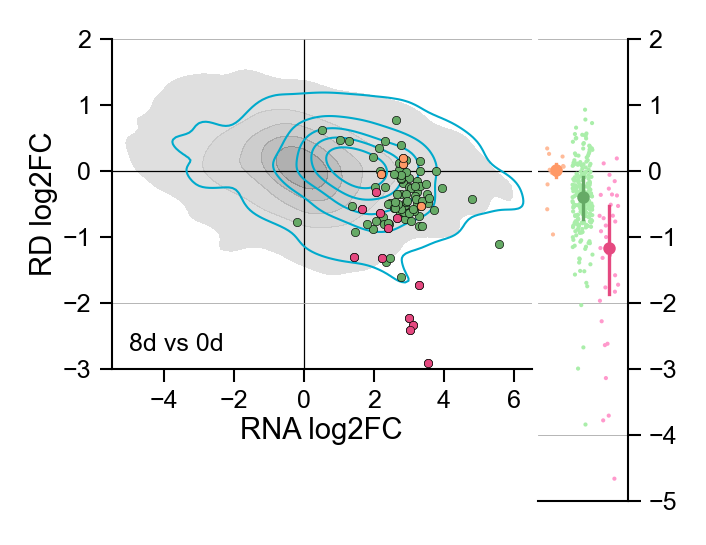

In [24]:
sF = 1 # Size factor
wgap = 0.02
hgap = 0
nrow, ncol = 2, 2

width_ratios = [1.4, 0.3]
height_ratios = [1, 0.4]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h*1.1 ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

# Density plot + scatter plot (left) -------------------------
ax = fig.add_subplot(grid[0,0])

ax.axhline(0, c='k', lw=0.3)
ax.axvline(0, c='k', lw=0.3)
ax.axhline(2, c='#AAAAAA', lw=0.2)
ax.axhline(-2, c='#AAAAAA', lw=0.2)

sns.kdeplot(data=logFC, x='R8', y='RD8',
            linewidths=0.3, color='#000000', alpha=0.5,
            fill=True, levels=6,
            ax=ax, zorder=0)

data = pd.merge(Genesets['All MitoCarta'], logFC, on='gene_id')
# ax.scatter(data['R8'], data['RD8'], c='#F8071D', s=1, alpha=0.5, lw=0)
sns.kdeplot(data=data, x='R8', y='RD8',
            linewidths=0.5, color='#00AACC',
            fill=False, levels=6,
            ax=ax, zorder=3)

data = pd.merge(Genesets['OXPHOS complex'], logFC, on='gene_id')
ax.scatter(data['R8'], data['RD8'], c='#66AA66', s=4, alpha=1, lw=0.15, edgecolors='k', zorder=4)

data = pd.merge(Genesets['mtDNA'], logFC, on='gene_id')
ax.scatter(data['R8'], data['RD8'], c='#E54980', s=4, alpha=1, lw=0.15, edgecolors='k', zorder=4)

data = pd.merge(Genesets['Complex II'], logFC, on='gene_id')
ax.scatter(data['R8'], data['RD8'], c='#FF9966', s=4, alpha=1, lw=0.15, edgecolors='k', zorder=4)

ax.text(-5, -2.8, '8d vs 0d', ha='left', va='bottom', fontsize=6)

ax.set_xlim(-5.5, 6.5)
# ax.set_ylim(-2, 2)
ax.set_ylim(-3, 2)
ax.set_xticks([-4, -2, 0, 2, 4, 6])
ax.tick_params(width=0.5, length=3, pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

ax.set_xlabel('RNA log2FC', labelpad=1)
ax.set_ylabel('RD log2FC', labelpad=1)


# Strip plot + point plot -------------------------

ax = fig.add_subplot(grid[:,1])
ax.axhline(0, c='k', lw=0.3)
ax.axhline(2, c='#AAAAAA', lw=0.2)
ax.axhline(-2, c='#AAAAAA', lw=0.2)
ax.axhline(-4, c='#AAAAAA', lw=0.2)

using_data = plot_data[plot_data['Day']=='8']
sns.stripplot(data=using_data, hue="tmp", y="Value", dodge=True,
                palette=['#FFBB99','#AAEEAA','#FF99CC'],
                size = 1, 
                jitter= 0.3,
                ax=ax, linewidth = 0,
                legend=False)
sns.pointplot(data=using_data, hue="tmp", y="Value", dodge=0.535,
                estimator='median', marker=".", markersize=6, markeredgewidth=0, 
                palette=['#FF9966','#66AA66','#E54980'],
                errorbar=('pi',50), lw=0.8,
                # errorbar='sd', lw=0.8,
                linestyle="none", zorder=5, legend=False)

ax.set_xlim(-0.45, 0.45)
# ax.set_ylim(-5.1,1)
ax.set_ylim(-5, 2)
ax.set_xticks([])
ax.set_yticks([-5,-4,-3,-2,-1,0,1,2])
ax.tick_params(width=0.5, length=3, pad=2)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)    

ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_ylabel(f'RD log2FC, 8d vs 0d', labelpad=1, rotation=-90, va='bottom')


plt.savefig('mito-OXPHOS_RNA-RD_logFC_scatter-strip.pdf', bbox_inches='tight')
plt.show()
plt.close()